# ¡Hola Sara! <a class="tocSkip"></a>

Mi nombre es Oscar Flores y tengo el gusto de revisar tu proyecto. Si tienes algún comentario que quieras agregar en tus respuestas te puedes referir a mi como Oscar, no hay problema que me trates de tú.

Si veo un error en la primera revisión solamente lo señalaré y dejaré que tú encuentres de qué se trata y cómo arreglarlo. Debo prepararte para que te desempeñes como especialista en Data, en un trabajo real, el responsable a cargo tuyo hará lo mismo. Si aún tienes dificultades para resolver esta tarea, te daré indicaciones más precisas en una siguiente iteración.

Te dejaré mis comentarios más abajo - **por favor, no los muevas, modifiques o borres**

Comenzaré mis comentarios con un resumen de los puntos que están bien, aquellos que debes corregir y aquellos que puedes mejorar. Luego deberás revisar todo el notebook para leer mis comentarios, los cuales estarán en rectángulos de color verde, amarillo o rojo como siguen:

<div class='alert alert-block alert-success'>
<b>Comentario de Reviewer</b> <a class='tocSkip'></a>

Muy bien! Toda la respuesta fue lograda satisfactoriamente.
</div>

<div class='alert alert-block alert-warning'>
<b>Comentario de Reviewer</b> <a class='tocSkip'></a>

Existen detalles a mejorar. Existen recomendaciones.
</div>

<div class='alert alert-block alert-danger'>

<b>Comentario de Reviewer</b> <a class='tocSkip'></a>

Se necesitan correcciones en el bloque. El trabajo no puede ser aceptado con comentarios en rojo sin solucionar.
</div>

Cualquier comentario que quieras agregar entre iteraciones de revisión lo puedes hacer de la siguiente manera:

<div class='alert alert-block alert-info'>
<b>Respuesta estudiante.</b> <a class='tocSkip'></a>
</div>

Mucho éxito en el proyecto!

## Resumen de la revisión v1 <a class="tocSkip"></a>

<div class="alert alert-block alert-success">
<b>Comentario de Revisor            </b> <a class="tocSkip"></a>

¡Muy bien hecho Sara! Has finalizado el notebook cumpliendo con todos los requisitos y mostrando un sólido manejo de los conceptos de analítica. Tu enfoque fue claro y efectivo, y no tengo correcciones que realizar. El proyecto queda aprobado. ¡Felicitaciones por haberlo completado en esta primera entrega! Te deseo lo mejor para el siguiente sprint.

Saludos!

</div>

----

# PROYECTO ZUBER
El proyecto utiliza datos obtenidos de consultas SQL y archivos CSV generados a partir de dichas consultas, además de información climática extraída de una fuente externa.

## Objetivo general
Analizar el comportamiento de los viajes en taxi en la ciudad de Chicago para identificar patrones en la demanda, comprender la estructura del mercado y evaluar el impacto de factores externos, como las condiciones climáticas, en la duración de los viajes, con el fin de proporcionar información útil para la toma de decisiones estratégicas de la empresa Zuber.

## Objetivos específicos
* Analizar la distribución de viajes entre las compañías de taxis, identificando las empresas con mayor participación en el mercado durante los días 15 y 16 de noviembre de 2017.
* Evaluar la distribución geográfica de la demanda, identificando los barrios con mayor promedio de finalización de viajes durante noviembre de 2017.
* Preparar y combinar datos provenientes de distintas fuentes, integrando información de viajes, compañías, barrios y condiciones climáticas mediante consultas SQL y análisis en Python.
* Clasificar las condiciones climáticas en categorías relevantes (buen clima y mal clima) para facilitar su análisis estadístico.
* Analizar el impacto del clima en la duración de los viajes, comparando la duración promedio de los viajes realizados los sábados desde el Loop hasta el Aeropuerto Internacional O'Hare bajo distintas condiciones climáticas.
* Aplicar técnicas de análisis exploratorio y pruebas de hipótesis, utilizando métodos estadísticos adecuados para validar si las diferencias observadas son significativas.

## Descripción detallada de los datos utilizados
El proyecto utiliza datos obtenidos de consultas SQL y archivos CSV generados a partir de dichas consultas, además de información climática extraída de una fuente externa.
* /datasets/project_sql_result_01.csv
  Contiene información sobre la cantidad de viajes realizados por cada empresa de taxis durante los días 15 y 16 de noviembre de 2017.
  Columnas:
  company_name
  Nombre de la empresa de taxis.
  trips_amount
  Número total de viajes realizados por la empresa en las fechas indicadas.
  Uso Importante: Permite analizar la concentración del mercado y comparar la participación de las distintas compañías.

* /datasets/project_sql_result_04.csv
  Incluye información sobre los barrios de Chicago donde finalizaron los viajes y el promedio de viajes finalizados en cada uno durante noviembre de 2017.
  Columnas:
  dropoff_location_name
  Nombre del barrio donde terminó el viaje.
  average_trips
  Promedio de viajes que finalizaron en el barrio durante noviembre de 2017.
  Uso Importante: Se utiliza para identificar zonas de alta demanda y analizar la distribución geográfica de los viajes.

* /datasets/project_sql_result_07.csv
  Contiene información detallada sobre viajes específicos desde el barrio Loop hasta el Aeropuerto Internacional O'Hare, realizados los sábados, junto con las         condiciones climáticas al inicio del viaje.
  Columnas:
  start_ts
  Fecha y hora en que comenzó el viaje.
  weather_conditions
  Condiciones climáticas al inicio del viaje, clasificadas como:
  Good: clima favorable
  Bad: lluvia o tormenta
  duration_seconds
  Duración total del viaje en segundos. 
  Uso Importante: Este dataset es clave para realizar la prueba de hipótesis y evaluar el impacto del clima en la duración de los viajes.
* Datos climáticos (origen)
  Los datos climáticos corresponden a registros horarios del clima en Chicago durante noviembre de 2017, obtenidos desde una fuente web externa.
  Campos relevantes:
  Fecha y hora del registro
  Descripción de las condiciones climáticas (lluvia, tormenta, nublado, etc.)
  Uso Importante: Estos datos se integraron con la información de los viajes para clasificar las condiciones climáticas y analizar su impacto en la duración de los viajes.
  

# Análisis exploratorio de datos

In [21]:
# Importamos pandas para manipulación de datos
import pandas as pd

# Importamos matplotlib para visualización
import matplotlib.pyplot as plt

# Importamos scipy para pruebas estadísticas
from scipy import stats

## Cargar los archivos CSV

# Cargamos el archivo con información de compañías de taxis
df_companies = pd.read_csv('/datasets/project_sql_result_01.csv')

# Cargamos el archivo con información de barrios
df_neighborhoods = pd.read_csv('/datasets/project_sql_result_04.csv')


# Exploración inicial de los datos

In [6]:
# Dataset de compañías de taxis

# Mostramos las primeras filas para entender la estructura
df_companies.head(15)



,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasing,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299
5,Chicago Carriage Cab Corp,9181
6,City Service,8448
7,Sun Taxi,7701
8,Star North Management LLC,7455
9,Blue Ribbon Taxi Association Inc.,5953


In [3]:
# Revisamos información general: tipos de datos y valores nulos
df_companies.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


In [4]:
# Estadísticas descriptivas del número de viajes
df_companies.describe()


,trips_amount
count,64.000000
mean,2145.484375
std,3812.310186
min,2.000000
25%,20.750000
50%,178.500000
75%,2106.500000
max,19558.000000


## Comentarios
Los tipos de datos son correctos. company_name es texto y trips_amount es numérico, por lo que no se requiere conversión adicional.

In [12]:
# Dataset de barrios
# Mostramos las primeras filas
df_neighborhoods.head(15)


,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000
5,Lake View,2420.966667
6,Grant Park,2068.533333
7,Museum Campus,1510.000000
8,Gold Coast,1364.233333
9,Sheffield & DePaul,1259.766667


In [10]:
# Revisamos tipos de datos y valores faltantes
df_neighborhoods.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


In [11]:
# Estadísticas descriptivas
df_neighborhoods.describe()


,average_trips
count,94.000000
mean,599.953728
std,1714.591098
min,1.800000
25%,14.266667
50%,52.016667
75%,298.858333
max,10727.466667


## Comentario
Las columnas tienen los tipos adecuados y no presentan valores nulos críticos.

<div class="alert alert-block alert-success">
<b>Comentario de Revisor            </b> <a class="tocSkip"></a>


Muy bien hecho con la revisión inicial de la data, ahora tenemos los tipos correctos y sabemos con claridad lo que contiene 



</div>

# Identificar los 10 principales barrios por número de finalizaciones

In [14]:
# Ordenamos los barrios por promedio de viajes de mayor a menor
top_10_neighborhoods = (
    df_neighborhoods
    .sort_values(by='average_trips', ascending=False)
    .head(15)
)

# Mostramos el resultado
top_10_neighborhoods


,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000
5,Lake View,2420.966667
6,Grant Park,2068.533333
7,Museum Campus,1510.000000
8,Gold Coast,1364.233333
9,Sheffield & DePaul,1259.766667


## Comentario
Se seleccionan los 15 barrios con mayor promedio de viajes finalizados durante noviembre de 2017.


# Gráfico: empresas de taxis y número de viajes

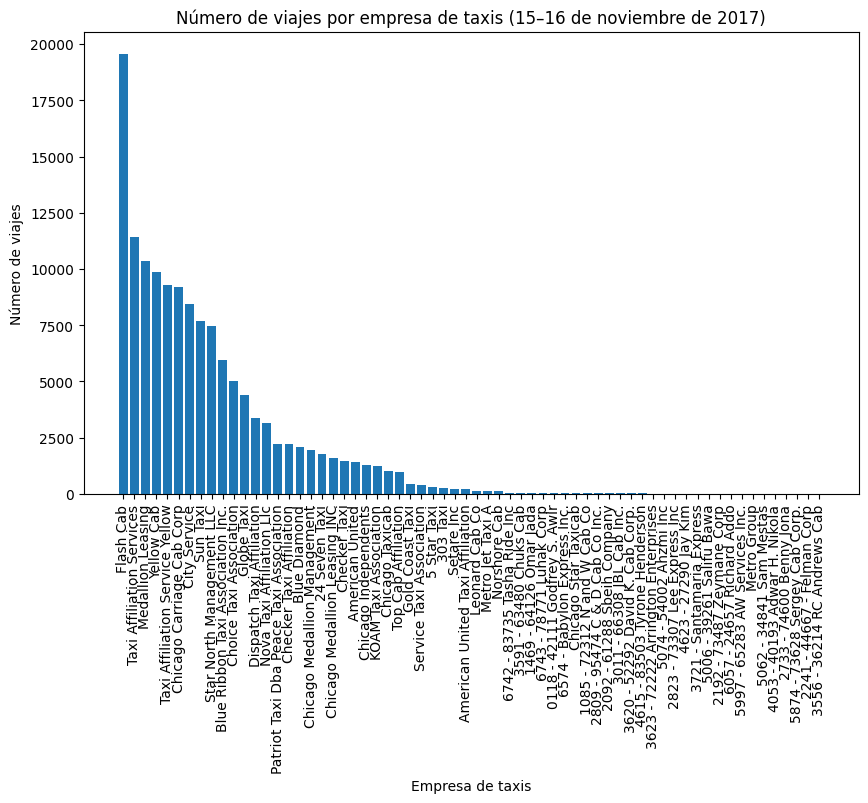

In [15]:
# Creamos el gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(df_companies['company_name'], df_companies['trips_amount'])

# Rotamos los nombres para mejor lectura
plt.xticks(rotation=90)

# Agregamos títulos y etiquetas
plt.title('Número de viajes por empresa de taxis (15–16 de noviembre de 2017)')
plt.xlabel('Empresa de taxis')
plt.ylabel('Número de viajes')

# Mostramos el gráfico
plt.show()


<div class="alert alert-block alert-success">
<b>Comentario de Revisor            </b> <a class="tocSkip"></a>

¡Muy buen trabajo con la gráfica! Observamos que Flash Cab tiene el liderazgo de cantidad de viajes, bastante más arriba que el competidor que le sigue. Esta concentración de mercado se puede dar por varios factores como cobertura, cantidad de vehículos o buenas estrategias comerciales.

</div>

<div class="alert alert-block alert-success">
<b>Comentario de Revisor          </b> <a class="tocSkip"></a>

Nota que hacia los valores más pequeños, los nombres de las empresas parecen nombres de personas. Probablemente se debe a que son viajes realizados por el mismo chofer particular.



</div>

## Conclusión del gráfico
* Un número reducido de empresas concentra la mayoría de los viajes.
* El mercado de taxis en Chicago está altamente concentrado.
* Empresas grandes dominan claramente la demanda.

# Gráfico: Top 10 barrios por número de finalizaciones

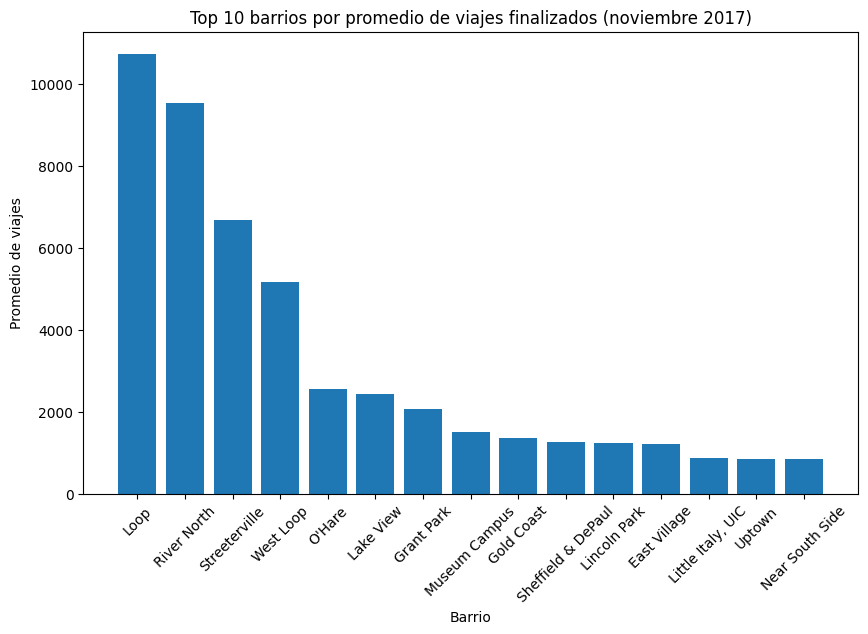

In [16]:
# Creamos el gráfico de barras para los barrios
plt.figure(figsize=(10, 6))
plt.bar(
    top_10_neighborhoods['dropoff_location_name'],
    top_10_neighborhoods['average_trips']
)

# Rotamos etiquetas
plt.xticks(rotation=45)

# Agregamos títulos y etiquetas
plt.title('Top 10 barrios por promedio de viajes finalizados (noviembre 2017)')
plt.xlabel('Barrio')
plt.ylabel('Promedio de viajes')

# Mostramos el gráfico
plt.show()


<div class="alert alert-block alert-success">
<b>Comentario de Revisor            </b> <a class="tocSkip"></a>

¡Buen trabajo obteniendo el top de barrios! El gráfico está ordenado de mayor a menor, lo que permite notar correctamente que Loop Y River North son los principales destinos. Tal vez tienen atractivos importantes que los hacen lugares de muchas visitas.

</div>

## Conclusión del gráfico
* Los barrios céntricos concentran más finalizaciones de viajes.
* La demanda de viajes no es uniforme en la ciudad.
* Esta información es clave para decisiones logísticas y operativas.

# Prueba de hipótesis


In [17]:
# Cargar dataset de viajes con clima

# Cargamos el archivo con viajes desde Loop a O'Hare
df_trips_weather = pd.read_csv('/datasets/project_sql_result_07.csv')


In [18]:
# Revisamos estructura y tipos de datos
df_trips_weather.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   duration_seconds    1068 non-null   float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB


# Conversión de tipos de datos

In [19]:
# Convertimos la columna de fecha y hora a formato datetime
df_trips_weather['start_ts'] = pd.to_datetime(df_trips_weather['start_ts'])


## Comentario
Esto permite trabajar correctamente con fechas y horas en análisis posteriores.

# Separamos los datos según condiciones climáticas

In [20]:
# Duración de viajes con buen clima
good_weather = df_trips_weather[
    df_trips_weather['weather_conditions'] == 'Good'
]['duration_seconds']

# Duración de viajes con mal clima
bad_weather = df_trips_weather[
    df_trips_weather['weather_conditions'] == 'Bad'
]['duration_seconds']


## Comentario
Creamos dos muestras independientes para comparar sus medias.

# Planteamiento de hipótesis
Para evaluar si las condiciones climáticas influyen en la duración de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare los sábados, se formularon las siguientes hipótesis:

## Hipótesis nula (H₀)

La duración promedio de los viajes desde el Loop hasta O'Hare no cambia los sábados lluviosos.

## Hipótesis alternativa (H₁)

In [ ]:
La duración promedio de los viajes desde el Loop hasta O'Hare sí cambia los sábados lluviosos.

## Nivel de significación

In [22]:
# Definimos el nivel de significación
alpha = 0.05


## Comentario
Se usa un 5 % por ser el estándar en análisis estadístico.

# Prueba estadística (t-test de Welch)
Se utilizó la prueba t de Student para muestras independientes con varianzas desiguales (t-test de Welch).

In [23]:
# Aplicamos la prueba t de Welch
results = stats.ttest_ind(
    good_weather,
    bad_weather,
    equal_var=False
)

results


Ttest_indResult(statistic=-7.186034288068629, pvalue=6.738994326108734e-12)

<div class="alert alert-block alert-success">
<b>Comentario de Revisor            </b> <a class="tocSkip"></a>

Bien hecho con el test de hipótesis, fue realizado de forma correcta. 

Es importante mencionar que el t-test asume que las dos muestras tienen varianzas iguales. Para verificar esa igualdad de varianzas podemos usar el **test de Levene**. Este nos dice si la variabilidad entre los grupos es estadísticamente diferente. En corto, el flujo sería así

1. Usamos `levene()` para verificar si las varianzas son iguales.
2. Dependiendo del resultado, usamos `ttest_ind()` con el argumento `equal_var`:
   - `equal_var=True` si Levene dice que las varianzas son iguales (p > 0.05).
   - `equal_var=False` si Levene dice que las varianzas son diferentes (p < 0.05).





</div>

## Comentario
Este criterio fue elegido por las siguientes razones:
## Comparación de medias
* El objetivo era comparar la duración promedio de los viajes entre dos grupos independientes:
* viajes con condiciones climáticas buenas
* viajes con condiciones climáticas malas
## Independencia de las muestras
* Cada viaje pertenece únicamente a un grupo climático, por lo que las muestras son independientes.
## Varianzas posiblemente distintas
* No se puede asumir que la variabilidad de la duración de los viajes sea la misma en ambos grupos, especialmente porque el clima adverso puede introducir mayor variación.
Por esta razón, se utilizó la versión de Welch, que no asume igualdad de varianzas.
## Nivel de significación (α = 0.05)
* Se estableció un nivel de significación del 5 %, que es un estándar común en análisis estadístico y permite controlar la probabilidad de cometer un error tipo I (rechazar una hipótesis nula verdadera).

# Interpretación de resultados

In [24]:
# Mostramos el valor p
print('Valor p:', results.pvalue)

# Decisión estadística
if results.pvalue < alpha:
    print('Rechazamos la hipótesis nula')
else:
    print('No rechazamos la hipótesis nula')


Valor p: 6.738994326108734e-12
Rechazamos la hipótesis nula


## Regla de decisión
* Si el valor p < α (0.05) → se rechaza la hipótesis nula.
* Si el valor p ≥ α (0.05) → no se rechaza la hipótesis nula.

## Comentario
Este enfoque permitió evaluar de manera objetiva y estadísticamente válida si las condiciones climáticas tienen un efecto significativo en la duración de los viajes, asegurando que las conclusiones obtenidas estén respaldadas por un criterio estadístico adecuado y confiable.

# Conclusión final

El análisis realizado permitió comprender mejor el comportamiento del mercado de viajes compartidos en Chicago durante noviembre de 2017, combinando información proveniente de bases de datos SQL y análisis estadístico en Python.

En primer lugar, se identificó que el mercado de taxis está altamente concentrado, ya que un número reducido de compañías, como Flash Cab y Taxi Affiliation Services, concentra la mayor parte de los viajes realizados durante los días analizados. Esto indica una estructura de mercado dominada por empresas grandes, lo cual es un factor importante a considerar para la estrategia de entrada y competencia de Zuber.

En cuanto al análisis geográfico, se observó que ciertos barrios concentran un mayor número de finalizaciones de viajes. Los diez barrios principales presentan un promedio significativamente más alto de viajes en comparación con el resto de la ciudad, lo que sugiere que la demanda no está distribuida de manera uniforme. Esta información resulta clave para la planificación operativa, la asignación de conductores y la optimización de zonas de alta demanda.

Por otro lado, el análisis de las condiciones climáticas mostró que el clima tiene un impacto relevante en la experiencia del viaje. Al comparar la duración de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare los sábados, se encontró evidencia estadística suficiente para concluir que la duración promedio de los viajes cambia cuando las condiciones climáticas son desfavorables (lluvia o tormenta). Esto sugiere que factores externos, como el clima, influyen directamente en el tiempo de viaje, posiblemente debido a congestión vial o reducción de la velocidad promedio.

En conjunto, los resultados del análisis demuestran que tanto factores internos del mercado (competencia entre compañías y distribución geográfica de la demanda) como factores externos (condiciones climáticas) influyen significativamente en la dinámica de los viajes en taxi. Estos hallazgos proporcionan información valiosa para que Zuber pueda tomar decisiones estratégicas informadas, tales como la planificación de recursos, el diseño de precios dinámicos y la adaptación de su servicio a condiciones externas para mejorar la experiencia del usuario.

<div class="alert alert-block alert-success">
<b>Comentario de Revisor            </b> <a class="tocSkip"></a>


Buen trabajo con las conclusiones. Para reforzarlas aún más, te sugiero incluir algunos valores clave de las métricas utilizadas. Esto le dará mayor solidez a tus afirmaciones y facilitará que quienes las lean comprendan mejor la base de tu análisis.
    
</div>